In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load
data = pd.read_csv('source/mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Trocar valores para escalares
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [5]:
# X = features e Y classificacao (Venenoso ou nao)
X = data.drop(columns='class')
y = data['class']  # 1 venenoso, 0 comestivel

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# inicializar o valor K (quantos vizinhos levar em conta)
knn = KNeighborsClassifier(n_neighbors=5)

In [8]:
# treinar modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
# Predicoes
y_pred = knn.predict(X_test)

In [10]:
# acuracia de modelo
accuracy_knn = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_knn * 100:.2f}%")

Accuracy: 99.59%


In [11]:
#  classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1257
           1       0.99      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



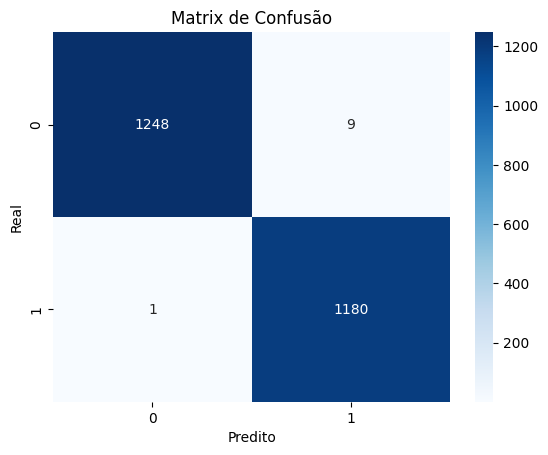

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrix de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

In [13]:
# melhor valor para K
error_rate = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

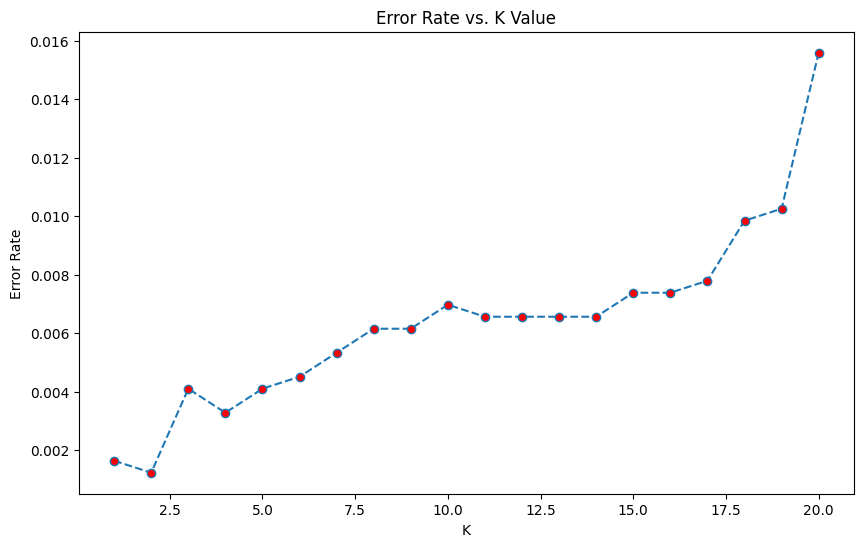

In [14]:
# plotar % erro vs K
plt.figure(figsize=(10,6))
plt.plot(range(1,21), error_rate, marker='o', linestyle='dashed', markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [15]:
# Modelo SVM
svm = SVC(kernel='poly')  # linear deu 96%
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [16]:
# Avaliação do modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Acurácia do SVM: {accuracy_svm}')
print("Relatório de Classificação do SVM:")
print(classification_report(y_test, y_pred_svm))

Acurácia do SVM: 0.9995898277276456
Relatório de Classificação do SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



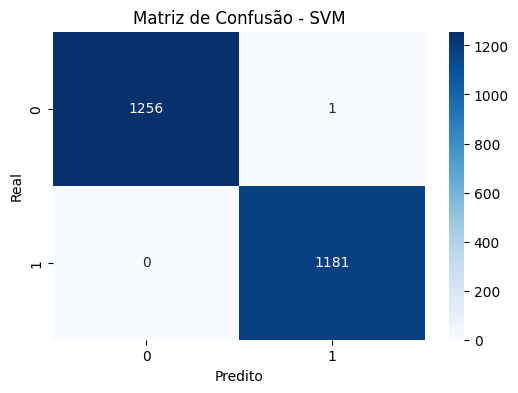

In [17]:
# Matriz de Confusão para SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - SVM")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

In [18]:
# Comparação dos resultados
print(f'Comparação das acurácias:\nKNN: {accuracy_knn * 100:.2f}%\nSVM: {accuracy_svm * 100:.2f}%')

Comparação das acurácias:
KNN: 99.59%
SVM: 99.96%


class
0    3365
1    3134
Name: count, dtype: int64


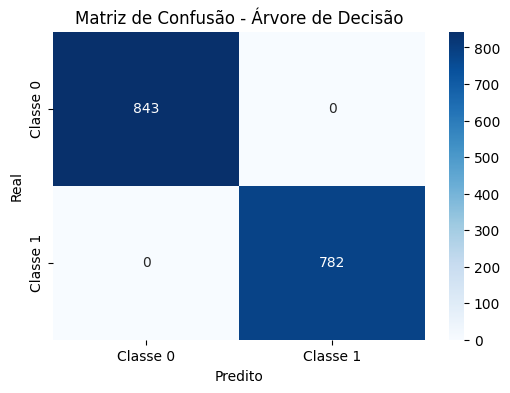

Relatório de Classificação - Árvore de Decisão
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Validação Cruzada - Acurácia média: 1.00 ± 0.00


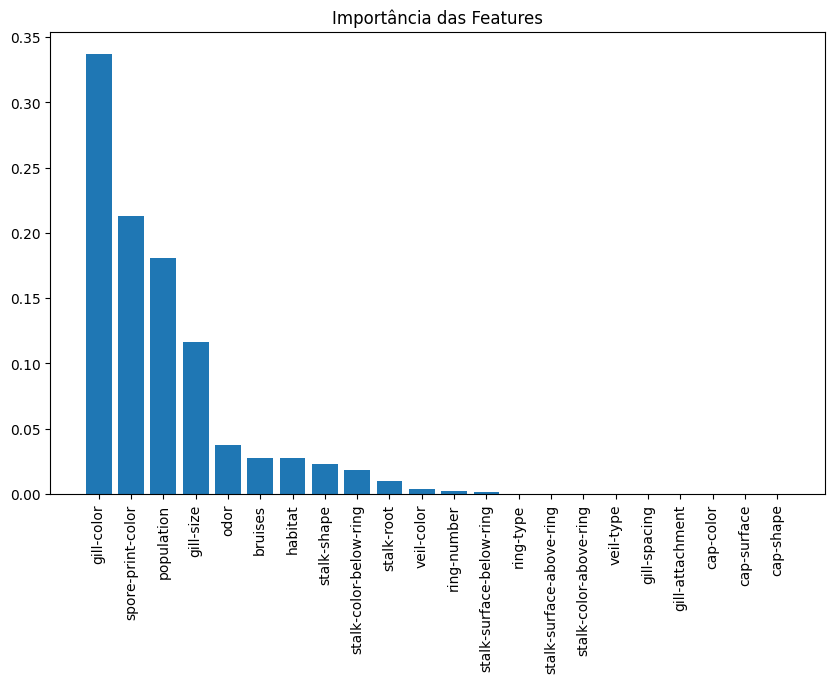

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts())
if y_train.value_counts().min() / y_train.value_counts().max() < 0.5: 
    X_train_balanced, y_train_balanced = resample(X_train, y_train, 
                                                  replace=True, 
                                                  n_samples=X_train.shape[0], 
                                                  random_state=42)
else:
    X_train_balanced, y_train_balanced = X_train, y_train

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

y_pred_dt = dt_model.predict(X_test)

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', fmt="d", 
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

print("Relatório de Classificação - Árvore de Decisão")
print(classification_report(y_test, y_pred_dt))

cv_scores = cross_val_score(dt_model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print(f"Validação Cruzada - Acurácia média: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


importances = dt_model.feature_importances_
indices = importances.argsort()[::-1]  


plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()
